In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/plant-pathology-2020-fgvc7-no-background/sample_submission.csv
/kaggle/input/plant-pathology-2020-fgvc7-no-background/test.csv
/kaggle/input/plant-pathology-2020-fgvc7-no-background/train.csv
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_1283.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_1334.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_865.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_834.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_1055.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_431.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_1526.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_251.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_749.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_659.jpg
/kaggle/input/plant-pathology-2020-

/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_1524.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_1747.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_704.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_1401.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_1795.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_14.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_1283.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_24.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_1008.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_1191.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_898.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Test_1026.jpg
/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/Train_158.jpg
/kaggle/input

In [73]:
df = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7-no-background/sample_submission.csv')
test = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7-no-background/test.csv')
train = pd.read_csv('/kaggle/input/plant-pathology-2020-fgvc7-no-background/train.csv')

In [74]:
train.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [75]:
x = train['image_id']

In [76]:
img_size= 80
train_image=[]
for name in train['image_id']:
    path='/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    train_image.append(image)

In [77]:
test_image=[]
for name in test['image_id']:
    path='/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    test_image.append(image)

In [78]:
#x_train = np.array(train_image)
#y = train.drop(['image_id'],axis=1)

In [79]:
X_Train = np.ndarray(shape=(len(train_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in train_image:
    #X_Train[i]=img_to_array(image)
    X_Train[i]=train_image[i]
    i=i+1
X_Train=X_Train/255
print('Train Shape: {}'.format(X_Train.shape))


Train Shape: (1821, 80, 80, 3)


In [80]:
X_Test = np.ndarray(shape=(len(test_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in test_image:
    #X_Test[i]=img_to_array(image)
    X_Test[i]=test_image[i]
    i=i+1
    
X_Test=X_Test/255
print('Test Shape: {}'.format(X_Test.shape))

Test Shape: (1821, 80, 80, 3)


In [81]:
y = train.drop(['image_id'],axis=1)
y.head()

,healthy,multiple_diseases,rust,scab
0,0,0,0,1
1,0,1,0,0
2,1,0,0,0
3,0,0,1,0
4,1,0,0,0


In [82]:
y_train = np.array(y.values)
y_train.shape

(1821, 4)

In [83]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten,BatchNormalization
from keras.optimizers import SGD
from keras.optimizers import Adam

In [84]:
def const():
        model = Sequential()
        
        
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', input_shape=(img_size, img_size, 3),
                activation='relu'))
        model.add(BatchNormalization()) # Normalize the activations of the previous layer at each batch
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.2))
    
        model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))
   
        model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Conv2D(filters=128, kernel_size=(5, 5), padding='SAME', activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Flatten()) # Flatten the input
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(4, activation='softmax'))
    # Configure the learning process
    # The loss function is the objective that the model will try to minimize
    # For any classification problem, use accuracy metric
        optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
        model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
        model.summary()
    
    
        return model


        


In [85]:
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler,ReduceLROnPlateau,ModelCheckpoint

In [86]:
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, y_train, 
                                                  test_size=0.2, random_state=42)

In [87]:
model = const()
image_gen = ImageDataGenerator(rotation_range=360,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip = True,
                              vertical_flip = True)
image_gen.fit(X_train)

reduce = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,
                          patience=5,verbose=1,min_lr=1e-3)

checkp = ModelCheckpoint('model.h5',verbose=1,save_best_only=True)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 80, 80, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 80, 80, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 80, 80, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 80, 80, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 80, 80, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 40, 40, 32)       

In [88]:

es = EarlyStopping(monitor='val_loss',patience=15)

model.fit_generator(image_gen.flow(X_train, Y_train, batch_size=32),
            steps_per_epoch=X_train.shape[0] // 32,
            epochs=100,
            verbose=1,
            callbacks=[reduce,checkp],
            validation_data=(X_val, Y_val))

Epoch 1/100
45/45 [==============================] - 83s 2s/step - loss: 1.5844 - accuracy: 0.3167 - val_loss: 1.4323 - val_accuracy: 0.3479

Epoch 00001: val_loss improved from inf to 1.43228, saving model to model.h5
Epoch 2/100
45/45 [==============================] - 80s 2s/step - loss: 1.3077 - accuracy: 0.3659 - val_loss: 1.4897 - val_accuracy: 0.3479

Epoch 00002: val_loss did not improve from 1.43228
Epoch 3/100
45/45 [==============================] - 76s 2s/step - loss: 1.3074 - accuracy: 0.3364 - val_loss: 1.7195 - val_accuracy: 0.3479

Epoch 00003: val_loss did not improve from 1.43228
Epoch 4/100
45/45 [==============================] - 76s 2s/step - loss: 1.2784 - accuracy: 0.3574 - val_loss: 1.6431 - val_accuracy: 0.3479

Epoch 00004: val_loss did not improve from 1.43228
Epoch 5/100
45/45 [==============================] - 76s 2s/step - loss: 1.2560 - accuracy: 0.3715 - val_loss: 1.3907 - val_accuracy: 0.3479

Epoch 00005: val_loss improved from 1.43228 to 1.39067, savi

45/45 [==============================] - 75s 2s/step - loss: 0.3858 - accuracy: 0.8890 - val_loss: 0.3728 - val_accuracy: 0.8877

Epoch 00041: val_loss improved from 0.38184 to 0.37283, saving model to model.h5
Epoch 42/100
45/45 [==============================] - 76s 2s/step - loss: 0.3698 - accuracy: 0.8912 - val_loss: 0.4309 - val_accuracy: 0.8904

Epoch 00042: val_loss did not improve from 0.37283
Epoch 43/100
45/45 [==============================] - 76s 2s/step - loss: 0.3531 - accuracy: 0.8954 - val_loss: 0.3780 - val_accuracy: 0.8877

Epoch 00043: val_loss did not improve from 0.37283
Epoch 44/100
45/45 [==============================] - 76s 2s/step - loss: 0.3932 - accuracy: 0.8813 - val_loss: 0.3989 - val_accuracy: 0.8877

Epoch 00044: val_loss did not improve from 0.37283
Epoch 45/100
45/45 [==============================] - 75s 2s/step - loss: 0.3456 - accuracy: 0.8963 - val_loss: 0.5551 - val_accuracy: 0.8575

Epoch 00045: val_loss did not improve from 0.37283
Epoch 46/100


45/45 [==============================] - 76s 2s/step - loss: 0.3240 - accuracy: 0.9017 - val_loss: 0.3067 - val_accuracy: 0.9041

Epoch 00081: val_loss improved from 0.31207 to 0.30674, saving model to model.h5
Epoch 82/100
45/45 [==============================] - 76s 2s/step - loss: 0.3009 - accuracy: 0.9045 - val_loss: 0.4721 - val_accuracy: 0.8712

Epoch 00082: val_loss did not improve from 0.30674
Epoch 83/100
45/45 [==============================] - 76s 2s/step - loss: 0.3019 - accuracy: 0.9031 - val_loss: 0.4681 - val_accuracy: 0.8493

Epoch 00083: val_loss did not improve from 0.30674
Epoch 84/100
45/45 [==============================] - 76s 2s/step - loss: 0.3356 - accuracy: 0.8968 - val_loss: 0.3552 - val_accuracy: 0.8795

Epoch 00084: val_loss did not improve from 0.30674
Epoch 85/100
45/45 [==============================] - 76s 2s/step - loss: 0.2995 - accuracy: 0.9115 - val_loss: 0.4449 - val_accuracy: 0.8740

Epoch 00085: ReduceLROnPlateau reducing learning rate to 0.001.


In [89]:
loss = pd.DataFrame(model.history.history)
loss

,val_loss,val_accuracy,loss,accuracy,lr
0,1.432276,0.347945,1.585396,0.316713,0.002
1,1.489674,0.347945,1.310320,0.365871,0.002
2,1.719521,0.347945,1.305354,0.336376,0.002
3,1.643070,0.347945,1.277363,0.357444,0.002
4,1.390669,0.347945,1.256975,0.371489,0.002
...,...,...,...,...,...
95,0.355672,0.895890,0.332967,0.900281,0.001
96,0.386357,0.890411,0.311995,0.901685,0.001
97,0.306532,0.898630,0.306142,0.904861,0.001
98,0.309063,0.901370,0.295472,0.908381,0.001


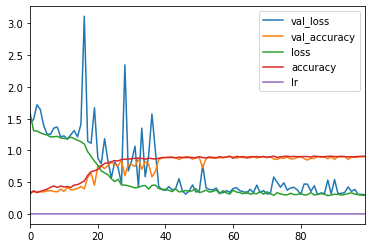

In [90]:
loss.plot()

In [91]:
#from keras.preprocessing import image
pred = model.predict(X_val)
pred

#print('Accuracy on test set: %0.2f%%' % (100 * compute_accuracy(X_val, Y_val)))

array([[3.9787981e-08, 8.6517530e-03, 9.9134821e-01, 8.5172119e-10],
       [8.4666312e-01, 4.3888953e-02, 6.2545590e-02, 4.6902291e-02],
       [9.5988655e-01, 7.8527667e-03, 1.6830778e-02, 1.5429798e-02],
       ...,
       [4.3594174e-14, 8.6823534e-03, 9.9131763e-01, 6.3003427e-13],
       [7.8314123e-08, 3.4512497e-02, 9.6548712e-01, 2.7454305e-07],
       [3.1066054e-02, 2.9413784e-02, 7.2554004e-04, 9.3879467e-01]],
      dtype=float32)

In [92]:
accuracy = model.evaluate(X_val, Y_val, verbose=1)
print('Test_Accuracy:-', accuracy[1]*100)

365/365 [==============================] - 4s 11ms/step
Test_Accuracy:- 90.13698697090149


In [98]:
predi = pred>0.7
predi

array([[False, False,  True, False],
       [ True, False, False, False],
       [ True, False, False, False],
       ...,
       [False, False,  True, False],
       [False, False,  True, False],
       [False, False, False,  True]])

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(classification_report(Y_val,predi))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79       100
           1       0.00      0.00      0.00        18
           2       0.97      0.93      0.95       120
           3       0.97      0.76      0.85       127

   micro avg       0.97      0.76      0.85       365
   macro avg       0.72      0.59      0.65       365
weighted avg       0.92      0.76      0.83       365
 samples avg       0.76      0.76      0.76       365



In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from glob import glob
from keras.applications.resnet50 import ResNet50
from sklearn.model_selection import train_test_split,KFold, cross_val_score, GridSearchCV
model = ResNet50(weights='imagenet')

In [ ]:
img_size= 224
train_image=[]
for name in train['image_id']:
    path='/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    train_image.append(image)

In [ ]:
test_image=[]
for name in test['image_id']:
    path='/kaggle/input/plant-pathology-2020-fgvc7-no-background/images/'+name+'.jpg'
    img=cv2.imread(path)
    image=cv2.resize(img,(img_size,img_size),interpolation=cv2.INTER_AREA)
    test_image.append(image)

In [ ]:
X_Train = np.ndarray(shape=(len(train_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in train_image:
    #X_Train[i]=img_to_array(image)
    X_Train[i]=train_image[i]
    i=i+1
X_Train=X_Train/255
print('Train Shape: {}'.format(X_Train.shape))

In [ ]:
X_Test = np.ndarray(shape=(len(test_image), img_size, img_size, 3),dtype = np.float32)
i=0
for image in test_image:
    #X_Test[i]=img_to_array(image)
    X_Test[i]=test_image[i]
    i=i+1
    
X_Test=X_Test/255
print('Test Shape: {}'.format(X_Test.shape))

In [ ]:
y = train.drop(['image_id'],axis=1)
y.head()

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_Train, y_train, 
                                                  test_size=0.2, random_state=42)

In [ ]:
image_gen = ImageDataGenerator(rotation_range=360,
                              width_shift_range=0.2,
                              height_shift_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip = True,
                              vertical_flip = True)
image_gen.fit(X_train)

reduce = ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,
                          patience=8,verbose=1,min_lr=1e-3)

checkp = ModelCheckpoint('model.h5',verbose=1,save_best_only=True)

In [ ]:
resnet_weights_path = '../input/resnet50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
#img_path = '/kaggle/input/plant-pathology-2020-fgvc7/train.csv'
#img = cv2.imread(path)
#x = image.img_to_array(img)
#x = np.expand_dims(x, axis=0)
#x = preprocess_input(x)

In [ ]:
mode = Sequential()

mode.add(ResNet50(include_top=False,input_shape=(224,224,3),pooling='max',classes=4,weights='imagenet'))
#mode.add(Flatten())
mode.add(Dense(512, activation='relu'))
mode.add(Dropout(0.5))
mode.add(BatchNormalization())
mode.add(Dense(256, activation='relu'))
mode.add(Dropout(0.5))
mode.add(BatchNormalization())
mode.add(Dense(4, activation='softmax'))

mode.layers[0].trainable = False
mode.summary()

In [ ]:
loss.to_csv('Plant Disease Prediction(Deep Learning).csv',index=False)

In [ ]:
mode.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
mode.fit_generator(image_gen.flow(X_train, Y_train, batch_size=32),
            steps_per_epoch=X_train.shape[0] // 32,
            epochs=40,
            verbose=1,
            callbacks=[reduce,checkp],
            validation_data=(X_val, Y_val))